In [93]:
# Multiple Regression-----

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

# from sklearn.model_selection import train_test_split

In [94]:
df01=pd.read_csv('./sorhtbiomtraining.csv')
df01.head()

,date,genotype,plot_id,mdexgrn,GT_Spad,GT_StoverN,GT_StoverDigestibility,GT_Spad.1,ccperexgr,GT_StoverN.1,GT_StoverDigestibility.1,drone_height,GT_height,GT_cepto,GT_Biom
0,03-Dec,5,1001,0.162304,28.6,2.30,61.10,28.6,0.113033,2.30,61.10,0.239349,38.6,0.32,131.4
1,03-Dec,4,1002,0.183857,23.8,2.28,61.20,23.8,0.136884,2.28,61.20,0.297211,42.1,0.48,129.0
2,03-Dec,6,1003,0.195432,24.9,1.94,60.48,24.9,0.172817,1.94,60.48,0.421204,46.1,0.69,236.2
3,03-Dec,2,1004,0.153846,30.5,2.62,61.27,30.5,0.080808,2.62,61.27,0.368591,44.9,0.24,132.7
4,03-Dec,3,1005,0.182320,26.5,2.22,60.43,26.5,0.170247,2.22,60.43,0.448669,53.8,0.75,303.3


In [95]:
X_train = df01.drop(['date','plot_id','genotype','GT_Spad','GT_StoverN','GT_Biom','GT_StoverDigestibility','GT_Spad.1','GT_StoverN.1','GT_StoverDigestibility.1','GT_height','GT_cepto'], axis=1)
y_train = df01['GT_Biom']

In [96]:
X_train.head()

,mdexgrn,ccperexgr,drone_height
0,0.162304,0.113033,0.239349
1,0.183857,0.136884,0.297211
2,0.195432,0.172817,0.421204
3,0.153846,0.080808,0.368591
4,0.182320,0.170247,0.448669


In [97]:
df= pd.read_csv("./sorhtbiomtesting_8718.csv")
df.head()

,date,genotype,plot_id,drone_height,ccperexgr,mdexgrn,GT_Biom
0,08-Dec,5,1001,0.428256,0.090688,0.275660,131.4
1,08-Dec,4,1002,0.558379,0.117576,0.284091,129.0
2,08-Dec,6,1003,0.568604,0.118117,0.287273,236.2
3,08-Dec,2,1004,0.560669,0.056038,0.276119,132.7
4,08-Dec,3,1005,0.688219,0.131442,0.289063,303.3


In [98]:
X_test= df[['mdexgrn','ccperexgr','drone_height']]
y_test = df['GT_Biom']

In [99]:
X_test.head()

,mdexgrn,ccperexgr,drone_height
0,0.275660,0.090688,0.428256
1,0.284091,0.117576,0.558379
2,0.287273,0.118117,0.568604
3,0.276119,0.056038,0.560669
4,0.289063,0.131442,0.688219


## Apply multiple Regression------

In [100]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [101]:
reg.coef_

array([-474.03621501,  991.46012426,  861.70744143])

In [102]:
reg.intercept_

-121.90409927106134

In [103]:
y_pred = reg.predict(X_train)

In [104]:
y_pred

array([ 119.47448115,  182.7648316 ,  319.74992412,  202.90311319,
        347.0845812 ,  389.15722234,  291.38462461,  235.27263907,
        109.17893316,   41.18077177,  249.26116854,  117.28432594,
        204.32705314,  300.37512212,  254.12555776,  219.15974622,
        264.39251801,  128.17888328,  191.63717683,  217.76367995,
        239.09986841,  264.6430857 ,  304.9171266 ,  140.26037951,
        292.26547165,  236.88206417,  126.27761406,  182.21191744,
        123.33022371,  332.48085398,  230.33240024,  241.77411212,
        209.78186964,  191.45389419,  246.48888741,  -77.80018799,
        -50.04800689,  -30.91478319,  -10.30318156,   57.79088478,
        107.30233924,  -37.55039737,  -88.80483296,  -55.15210371,
        -34.01950797,   39.03373045,  -14.51470107,  -71.18212344,
        128.45018486,   48.55206141,  555.22957668,  770.42962993,
        720.91623281,  690.65212741,  919.04927958,  773.4892874 ,
       1006.0280032 ,  789.95845862,  751.35620866,  511.24971

## Evaluating the Model

In [105]:
#Model Evaluation-----
from sklearn import metrics

In [106]:
# Calculating MAE-----of the model---
meanAbErr = metrics.mean_absolute_error(y_train, y_pred)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 78.25157724655503


In [107]:
print('R squared: {:.2f}'.format(reg.score(X_train,y_train)))

R squared: 0.88


In [108]:
meanSqErr = metrics.mean_squared_error(y_train, y_pred)

print('Mean Square Error:', meanSqErr)

Mean Square Error: 9877.472241930534


In [109]:
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('RMSE using Multiple Regression:',rootMeanSqErr)

RMSE using Multiple Regression: 99.38547299243756


In [110]:
# The Pearson correlation coefficient measures the linear relationship between two datasets.
# Pearson correlation coefficient and p-value for testing non-correlation.
# r is the Pearson’s correlation coefficient.
# The p-value, or probability value, tells you how likely it is that your data could have occurred under ,
# the null hypothesis.
from scipy import stats
r , p= stats.pearsonr(y_train,y_pred)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.9394019311151425
-----------------
The P-Value is :  5.881709392511918e-46


## Evaluating the Prediction-----

In [111]:
# create a new regression model to compare the model and prediction vale.
regnew=linear_model.LinearRegression()

In [112]:
y_pred_test= reg.predict(X_test)

In [113]:
regnew.fit(np.array(y_pred_test).reshape(-1,1),np.array(y_test).reshape(-1,1))

LinearRegression()

In [114]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 545.7240658187699


In [115]:
print('R-2 Score: {:.2f}'.format(regnew.score(np.array(y_pred_test).reshape(-1,1),np.array(y_test).reshape(-1,1))))

R squared: 0.70


In [116]:
meanSqErr = metrics.mean_squared_error(y_test, y_pred_test)

print('Mean Square Error:', meanSqErr)

Mean Square Error: 507160.4115300337


In [117]:
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE using Multiple Regression:',rootMeanSqErr)

RMSE using Multiple Regression: 712.1519581732775


In [118]:
# The Pearson correlation coefficient measures the linear relationship between two datasets.
# Pearson correlation coefficient and p-value for testing non-correlation.
# r is the Pearson’s correlation coefficient.
# The p-value, or probability value, tells you how likely it is that your data could have occurred under ,
# the null hypothesis.
from scipy import stats
r , p= stats.pearsonr(y_test,y_pred_test)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.8393442770974568
-----------------
The P-Value is :  3.7651386574831946e-39


## Visualizing regression model--------

<AxesSubplot:xlabel='mdexgrn', ylabel='GT_Biom'>

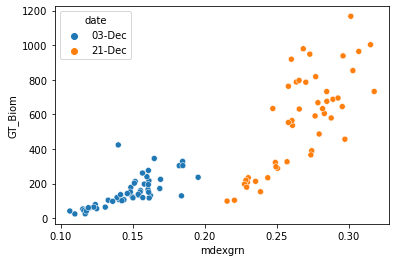

In [119]:
# Visualization of data with one variable-------with date wise..
import seaborn as sns
sns.scatterplot(data=df01, x=X_train['mdexgrn'],y=y_train, hue="date")

# sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"},line_kws={"color": "green"}).set(title='Regression plot of our model')

<AxesSubplot:xlabel='ccperexgr', ylabel='GT_Biom'>

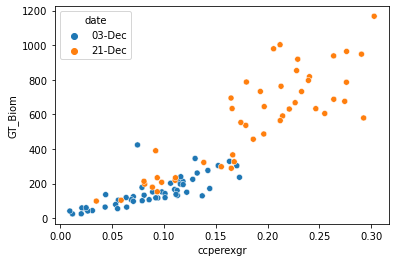

In [120]:
# Visualization of data with one variable------with date wise.
sns.scatterplot(data=df01, x=X_train['ccperexgr'],y=y_train, hue="date")

<AxesSubplot:xlabel='drone_height', ylabel='GT_Biom'>

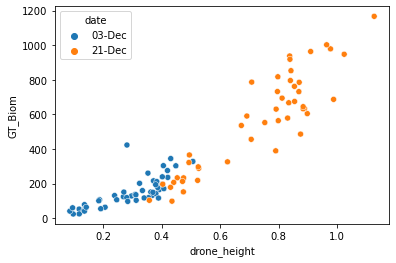

In [121]:
# Visualization of data with one variable-------with date wise.

sns.scatterplot(data=df01, x=X_train['drone_height'],y=y_train, hue="date")

[Text(0.5, 1.0, 'Regression plot of our model')]

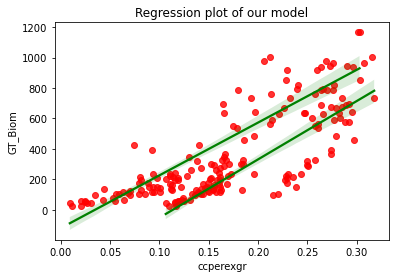

In [122]:
# Regression plot with two variable....
sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 
sns.regplot(x=X_train['ccperexgr'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 

[Text(0.5, 1.0, 'Regression plot of our model')]

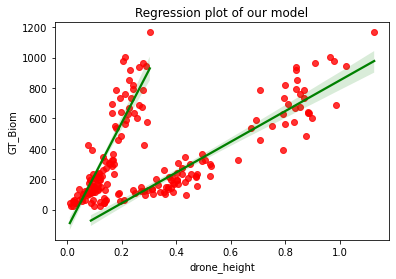

In [123]:
# Regression plot with two variable....
sns.regplot(x=X_train['ccperexgr'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 
sns.regplot(x=X_train['drone_height'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 


[Text(0.5, 1.0, 'Regression plot of our model')]

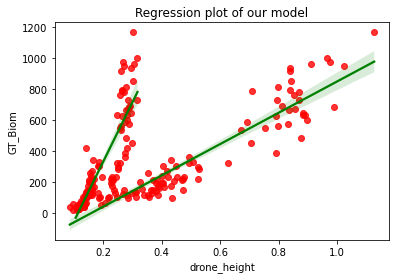

In [124]:
# Regression plot with two variable....
sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model')
sns.regplot(x=X_train['drone_height'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 


[Text(0.5, 1.0, 'Regression plot of our model')]

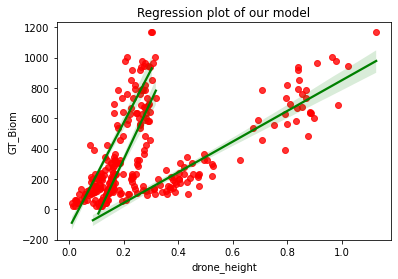

In [125]:
import seaborn as sns

sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 
sns.regplot(x=X_train['ccperexgr'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 
sns.regplot(x=X_train['drone_height'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 


[Text(0.5, 1.0, 'Regression plot of our model')]

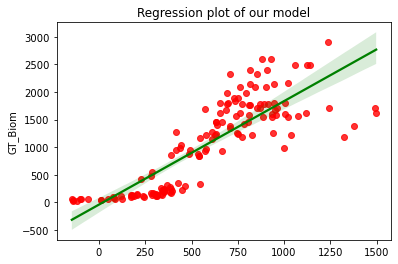

In [126]:
# Regression plot of test data .........


sns.regplot(x=y_pred_test,y=y_test,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 


# Evaluating Model Accuracy with Ridge Regression

In [127]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor = Ridge()
## parameters  is different values of lambda (used in cost function of ridge regressor)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_model = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [128]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.01}
-13252.533559684802


In [129]:

 
## training the model
 
ridgeReg = Ridge(alpha=0.01)
 
ridgeReg.fit(X_train,y_train)
 
y_pred_R = ridgeReg.predict(X_train)

meanAbErr = metrics.mean_absolute_error(y_train, y_pred)
print('Mean Absolute Error:', meanAbErr)
 
#calculating mse
 
mse = np.mean((y_pred_R - y_train)**2)
 
print('Mean squared error :',mse)

# Calculate RMSE

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_pred_R))
print('RMSE using Multiple Regression:',rootMeanSqErr)
 
## calculating score 
 
score = ridgeReg.score(X_train,y_train) 
 
print('R- Squared value:',score)

Mean Absolute Error: 78.25157724655503
Mean squared error : 9888.43059342782
RMSE using Multiple Regression: 99.44058825966295
R- Squared value: 0.8823456036675378


In [130]:
from scipy import stats
r , p= stats.pearsonr(y_train,y_pred)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.9394019311151425
-----------------
The P-Value is :  5.881709392511918e-46


In [131]:
ridgeReg.coef_

array([-379.46628867,  917.87343369,  858.3677982 ])

# Visualization of Model

[Text(0.5, 1.0, 'Ridge_Regression plot of our model')]

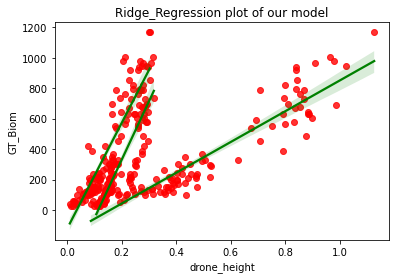

In [132]:
sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Ridge_Regression plot of our model') 
sns.regplot(x=X_train['ccperexgr'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Ridge_Regression plot of our model') 
sns.regplot(x=X_train['drone_height'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Ridge_Regression plot of our model') 


## Evaluating test data Accuracy

In [133]:
ridgeReg_new = Ridge(alpha=0.01)
ridgeReg_new.fit(X_test,y_test)

Ridge(alpha=0.01)

In [134]:
y_pred_test= ridgeReg_new.predict(X_test)

In [135]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', meanAbErr)
# calculating MSE.
mse = np.mean((y_pred_test - y_test)**2)
print('Mean squared error :',mse)

# Calculate RMSE

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE using Multiple Regression:',rootMeanSqErr)
 
## calculating score 
 
score = ridgeReg_new.score(X_test,y_test) 
 
print('R- Squared value:',score)

Mean Absolute Error: 339.0576236019029
Mean squared error : 179859.84840224017
RMSE using Multiple Regression: 424.09886630624254
R- Squared value: 0.7139718733163036


In [136]:
from scipy import stats
r , p= stats.pearsonr(y_test,y_pred_test)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.8449689348599176
-----------------
The P-Value is :  3.760628681559502e-40


In [137]:
ridgeReg_new = ridgeReg.predict(X_test)


[Text(0.5, 1.0, 'Regression plot of our model')]

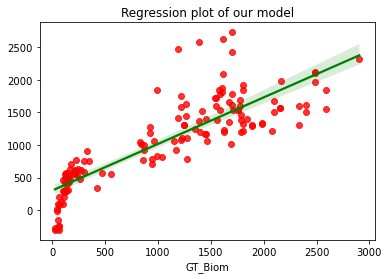

In [138]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred_test,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Regression plot of our model') 
